# Hands-on Activity 2.2 | Polynomial Regression


#### Objective(s):

This activity aims to perform regression analysis using polynomial regression


#### Intended Learning Outcomes (ILOs):

- Demonstrate how to build a regression model to predict the outcome using polynomial regression.
- Evaluate the performance of the regression model using polynomial regression


#### Resources:

- Jupyter Notebook
- internet_traffic_hist.csv


#### Procedure:


#### Using numpy polyfit to perform polynomial regression

Import the libraries and the data


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit


Load the dataset


In [7]:
df_hist = pd.read_csv(
    r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 312\Linear Regression\activities\dataset\internet_traffic_hist.csv"
)
df_hist.head(11)


,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


Build the first order polynomial using numpy polyfit


In [8]:
order = 1

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x, y, order)

print("The slope of line is {}.".format(m))
print("The y intercept is {}.".format(b))
print("The best fit simple linear regression line is {}x + {}.".format(m, b))


The slope of line is 79.52710966244517.
The y intercept is -159457.12265833953.
The best fit simple linear regression line is 79.52710966244517x + -159457.12265833953.


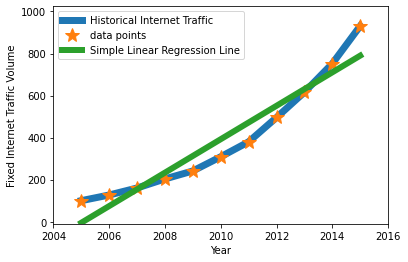

In [9]:
%matplotlib inline

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*', markersize = 15, label ='data points')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left');

# Graph 1
<a id ="graph1"></a>


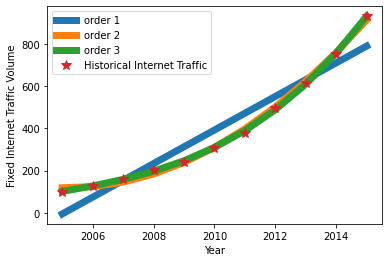

In [10]:
%matplotlib inline


models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
# wil give order a value of 1, 2, and 3 after last iteration
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)

# plot the poly1d models each from the list
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

#plot the data points to see which model fits it the best
plt.plot(x, y, '*', markersize = 10, label = 'Historical Internet Traffic', linewidth = 7)

#label will be the legends. call the plt.legen method to add the legend
plt.legend(loc = 'upper left');

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume');

Calculate the error for each order


In [11]:
# Calculate and store the erros
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(df_hist) # mse
    
    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

print(mse_hist)
print(errors_hist)


[5483.842045937109, 156.25749110204933, 25.17218335878678]
[0     105.267785
1      52.674431
2       6.517323
3      29.922941
4      71.548088
5      83.575940
6      91.914214
7      55.581414
8      14.741840
9      41.627281
10    141.197617
Name: traffic, dtype: float64, 0     18.700083
1      3.087283
2     14.781847
3     19.664207
4      2.832633
5      0.930694
6     17.533493
7      5.994267
8      6.477316
9      7.959866
10    17.229749
Name: traffic, dtype: float64, 0     1.307425
1     0.391248
2     2.027231
3     6.329836
4     5.283939
5     0.930693
6     9.416917
7     7.340106
8     6.277301
9     4.481335
10    0.162910
Name: traffic, dtype: float64]


# Graph 2
<a id ="graph2"></a>


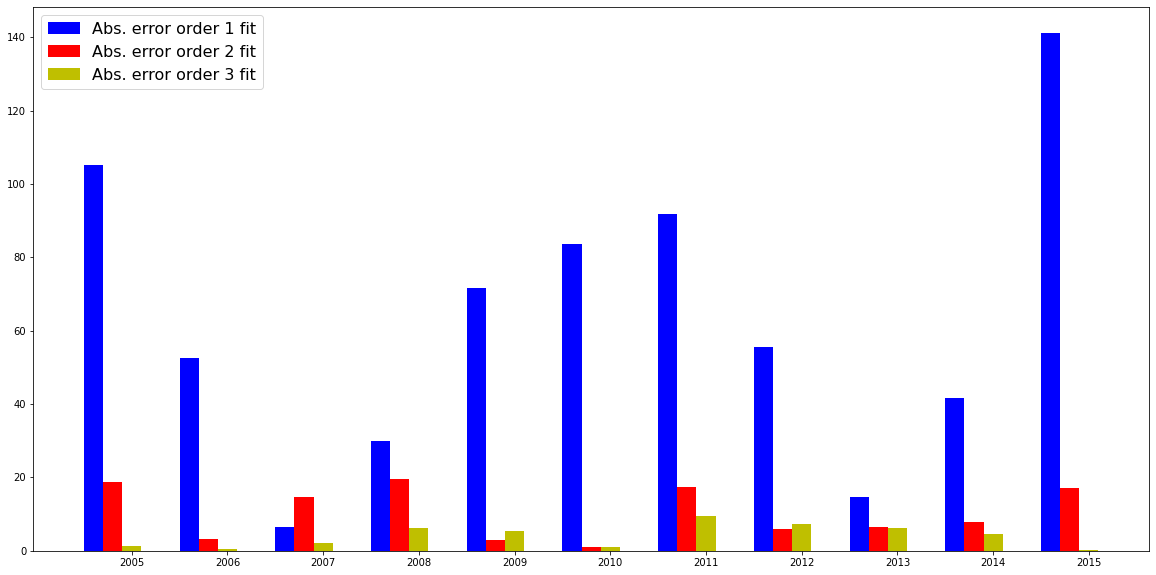

In [12]:
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar(x, errors_hist[0],
            width,
            color = 'b', 
            label = 'Abs. error order 1 fit')

p2 = ax.bar(x + width, errors_hist[1], 
            width, color = 'r', 
            label = 'Abs. error order 2 fit')

p3 = ax.bar(x + 2*width, 
            errors_hist[2], 
            width, 
            color = 'y', 
            label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

# Graph 3
<a id ="graph3"></a>


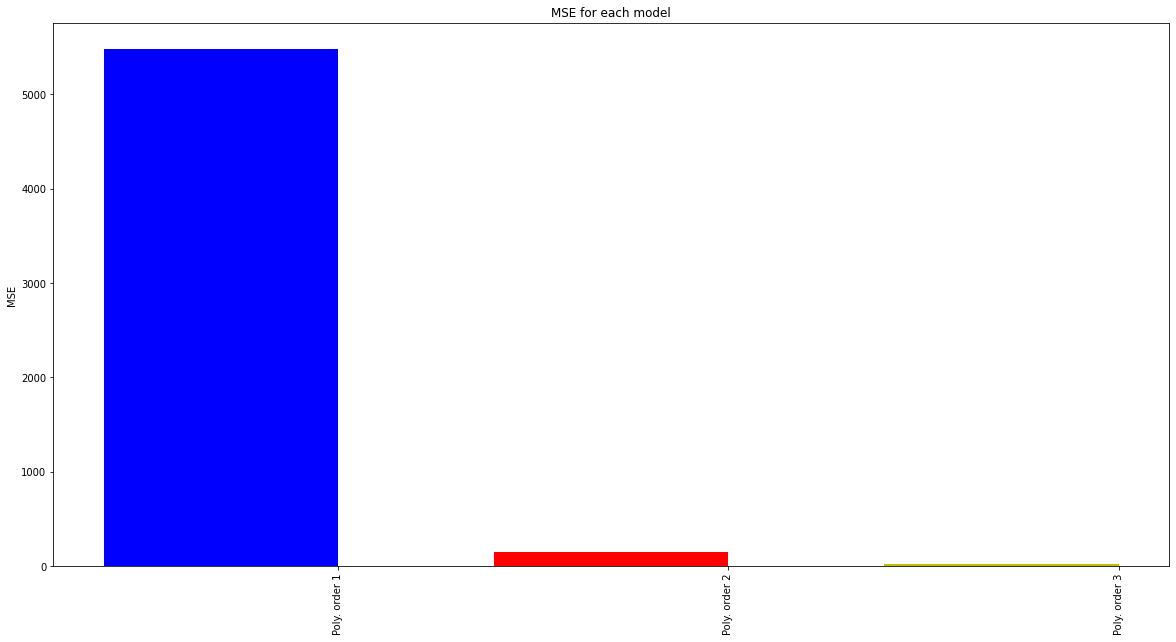

In [13]:
#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
ax.set(title = "MSE for each model", ylabel = "MSE")
plt.show()

Interpret the result of the fit error for each year

Based on the graph [here](#graph1), we can see that the data is more fitting for the equation of the 3rd order polynomial. We can infer right from the beginning that the 3rd order polynomial might be the best fit. The bar graph [here](#graph2) which lists the absolute error for every year per model shows that order 1 has the highest abolute error for every year. Absolute error is the difference between the predicted value and the actual value. It is expected that order 1 behaves this way since it's equation is the least representative of our values. Order 2 and Order 3 equations are close in representing our data, but order 2 has more absolute errors than order 3, surpassing order 3 absolute errors except for 2009 and 2012. The graph [here](#graph3) shows MSE for all orders. As exepcted, order 1 is highest, followed by order 2, followed by order 3 for all the same reaons I mentioned above.

In [14]:
# Polynomial function order
order = 3

x = df_hist.year.values  # regressor
y = df_hist.traffic.values  # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x, y, order)

print(type(p_array), p_array)


<class 'numpy.ndarray'> [ 4.83129404e-01 -2.90500578e+03  5.82252085e+06 -3.89005387e+09]


In [15]:
# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)
print(p)
print(type(p),"\n")
print("The value of the polynomial for x = 2020 is : {} ".format(p(2020)))


        3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
<class 'numpy.poly1d'> 

The value of the polynomial for x = 2020 is : 2328.578447341919 


In [16]:
# compute the absolute error for each value of x and the MSE error for the estimated polynomial model.
e = np.abs(y - p(x))
mse = np.sum(e ** 2) / len(x)

print("The estimated polynomial parameters are: {}".format(p))
print(
    "The errors for each value of x, given the estimated polynomial parameters are: \n {}".format(e)
)
print("The MSE is :{}".format(mse))

The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30742455 0.39124787 2.02723074 6.32983589 5.28393926 0.93069277
 9.41691735 7.34010558 6.27730129 4.48133456 0.16291044]
The MSE is :25.17218335878678


#### Using sklearn to perform polynomial regression


Import the necessary libraries


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Training the Polynomial Regression model using degree 3


In [18]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))


In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


LinearRegression()

Predict the result using polynomial regression model


In [20]:
y_pred = lin_reg.predict(X_poly)

In [21]:
df = pd.DataFrame({"Real Values": y, "Predicted Values": y_pred})


In [22]:
df

,Real Values,Predicted Values
0,100.000000,101.241621
1,126.933755,127.295561
2,160.303757,158.270689
3,203.390603,197.068289
4,241.292566,246.589653
5,308.791823,309.736067
6,379.980659,389.408822
7,495.840568,488.509202
8,616.207252,609.938498
9,752.103483,756.597998


Visualize the Polynomial Regression results


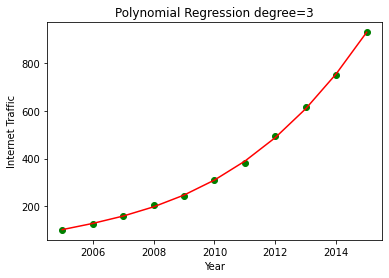

In [23]:
plt.scatter(x, y, color="green")
plt.plot(x, y_pred, color="red")

plt.title("Polynomial Regression degree=3")
plt.xlabel("Year")
plt.ylabel("Internet Traffic")


plt.show()


# Supplementary Activity:

- Choose your own dataset
- [Import the dataset](#sup1)
- [Perform polynomial regression using sklearn and polyfit](#sup2)
- [Measure the performance for each polynomial degree.](#sup3)
- [Plot the performance of the model for each polynomial degree.](#sup4)


# Import, data pre-processing, etc.
<a id="sup1"></a>

In [24]:
df_sal = pd.read_csv(".\dataset\position_salaries.csv")
df_sal.drop("Position", axis=1, inplace=True)
df_sal.rename(columns = {"Level":"Years of Experience"}, inplace=True)

In [25]:
df_sal

,Years of Experience,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [26]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Years of Experience  10 non-null     int64
 1   Salary               10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


# Polyfit 
<a id="sup2"></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

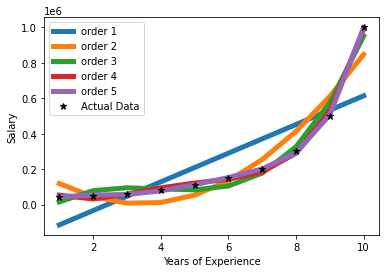

In [28]:
models = []
errors_hist = []
mse_hist = []

for order in range(1,6):
    p = np.poly1d(np.polyfit(df_sal["Years of Experience"], df_sal.Salary, order))
    models.append(p)

for model in models:
    plt.plot(df_sal["Years of Experience"], model(df_sal["Years of Experience"]),
             label = f"order {str(len(model))}",
             linewidth = 5)
plt.plot(df_sal["Years of Experience"], df_sal.Salary,"*", color = "black", label ="Actual Data",
         markersize = 7)

plt.legend(loc = "upper left")
plt.xlabel("Years of Experience")
plt.ylabel("Salary");    

Weirdly enough, after order 5 (order > 5), the line does not seem to change at all. 

## Performance (ABS error, MSE) for every order/model
<a id="sup4"></a>

In [29]:
# Calculate and store the erros
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

x = df_sal["Years of Experience"]
y = df_sal.Salary

for order in range(1,6):
    p = np.poly1d(np.polyfit(df_sal["Years of Experience"], df_sal.Salary, order))
    models.append(p)
    
    e = np.abs(df_sal.Salary-p(df_sal["Years of Experience"]))        # absolute error
    mse = np.sum(e**2)/len(df_sal) # mse
    
    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

print(mse_hist)
print(errors_hist)

[26695878787.878788, 6758833333.33333, 1515662004.662008, 210343822.8438234, 16382284.382280832]
[0    159454.545455
1     83575.757576
2     12696.969697
3     48181.818182
4     99060.606061
5    139939.393939
6    170818.181818
7    151696.969697
8     32575.757576
9    386545.454545
Name: Salary, dtype: float64, 0     73727.272727
1      5848.484848
2     51560.606061
3     68409.090909
4     56393.939394
5     15515.151515
6     54227.272727
7    112833.333333
8    110303.030303
9    153363.636364
Name: Salary, dtype: float64, 0    30097.902098
1    28759.906760
2    34960.372960
3     8223.776224
4    26729.603730
5    45179.487179
6    22405.594406
7    26312.354312
8    75694.638695
9    49538.461538
Name: Salary, dtype: float64, 0     8356.643357
1    18240.093240
2     1357.808858
3    14632.867133
4    11724.941725
5     6724.941725
6    15996.503497
7    10005.827506
8    28694.638695
9    11083.916084
Name: Salary, dtype: float64, 0    1104.895105
1    3836.829837
2    293

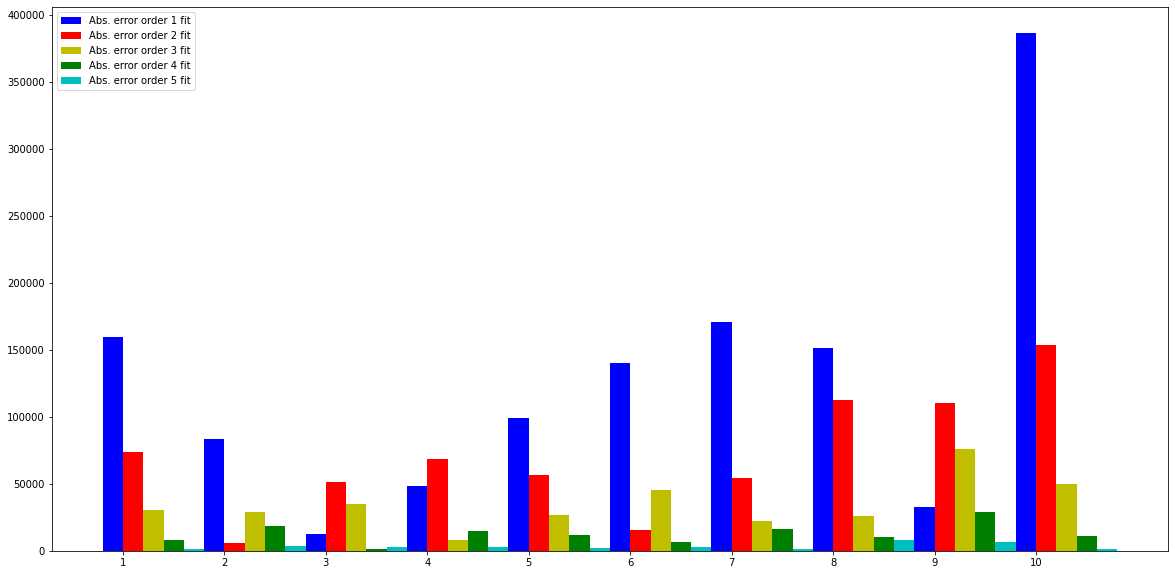

In [30]:
width = 0.2

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)

p1 = ax.bar(x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar(x+width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar(x+2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4  = ax.bar(x+3*width, errors_hist[3], width, color = 'g', label = 'Abs. error order 4 fit')
p5 = ax.bar(x+4*width, errors_hist[4], width, color = 'c', label = 'Abs. error order 5 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(x)
plt.legend(loc = "upper left")
plt.show()

As you can see, the 5ht order equation has the least absolute errors; therefore, it seems to represent our data best

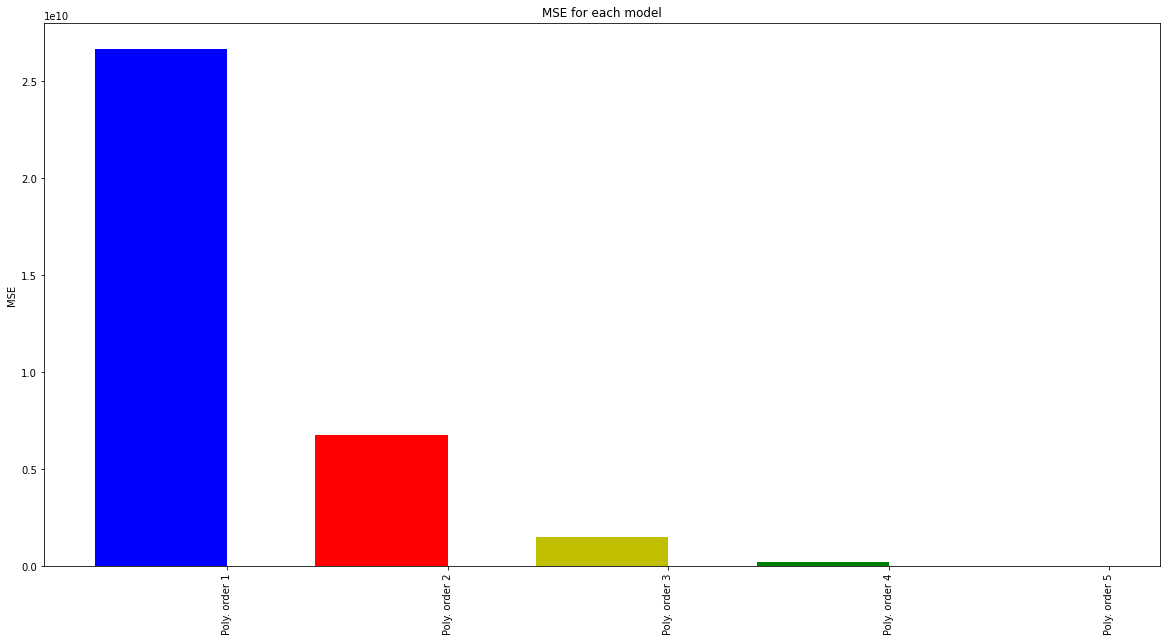

In [31]:
fig, ax = plt.subplots(figsize = (20,10))
x = np.array([0,1,2,3,4])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. error order 4 fit')
p5 = ax.bar( x[4], mse_hist[4], width, color = 'c', label = 'pred. error order 5 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Poly. order 4', 'Poly. order 5'], rotation=90)
ax.set(title = "MSE for each model", ylabel = "MSE")
plt.show()

It seems model with order 5 has the least mean sqauared error, which is not surprising

In [32]:
p = np.poly1d(np.polyfit(df_sal["Years of Experience"], df_sal.Salary, 5))
print(p)
print(type(p),"\n")
print("The value of the polynomial for x = 15 is : {} ".format(p(10)))

       5        4             3             2
157.7 x - 3446 x + 2.816e+04 x - 1.004e+05 x + 1.607e+05 x - 4.133e+04
<class 'numpy.poly1d'> 

The value of the polynomial for x = 15 is : 998377.6223776434 


In [33]:
e = np.abs(df_sal["Salary"] - p(df_sal["Years of Experience"]))
mse = np.sum(e ** 2) / len(df_sal)

print("The estimated polynomial parameters are:\n {}".format(p))
print(
    "The errors for each value of x, given the estimated polynomial parameters are: \n {}".format(e)
)
print("The MSE is :{}".format(mse))

The estimated polynomial parameters are:
        5        4             3             2
157.7 x - 3446 x + 2.816e+04 x - 1.004e+05 x + 1.607e+05 x - 4.133e+04
The errors for each value of x, given the estimated polynomial parameters are: 
 0    1104.895105
1    3836.829837
2    2934.731935
3    2713.286713
4    2263.403263
5    2736.596737
6    1349.650350
7    8428.904429
8    6617.715618
9    1622.377622
Name: Salary, dtype: float64
The MSE is :16382284.382280832


# Sklearn
<a id="sup3"></a>

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [35]:
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(df_sal["Years of Experience"].values.reshape(-1,1))

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, df_sal["Salary"])

LinearRegression()

In [37]:
y_pred = lin_reg.predict(X_poly)
y_pred

array([ 43895.10489615,  53836.82983732,  57065.26806592,  77286.71328757,
       112263.40326422, 152736.59673709, 201349.65034964, 291571.0955705 ,
       506617.71561641, 998377.62237519])

In [38]:
df = pd.DataFrame({"Actual": df_sal["Salary"], "Predicted": y_pred})
df

,Actual,Predicted
0,45000,43895.104896
1,50000,53836.829837
2,60000,57065.268066
3,80000,77286.713288
4,110000,112263.403264
5,150000,152736.596737
6,200000,201349.650350
7,300000,291571.095570
8,500000,506617.715616
9,1000000,998377.622375


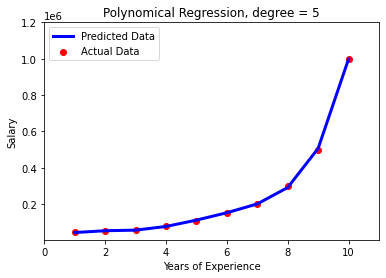

In [39]:
plt.scatter(df_sal["Years of Experience"], df_sal["Salary"], color = "red", label = "Actual Data")
plt.plot(df_sal["Years of Experience"], y_pred, color = "blue", linewidth = 3, label = "Predicted Data")

plt.title("Polynomical Regression, degree = 5")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.axis([0,11,4000,1200000])
plt.legend(loc="upper left")
plt.show();

# Conclusion:


In conlcusion, the polynomial regression exercise was a success. This exercise offered me a step-by-step solution in how to process and create polynomial regression models. I also learned how to use sklearn to perform polynomial regression. I also learned how to use numpy polyfit to perform polynomial regression. I really appreciate the time I spent on this exercise and all the knowledge I gained from it. I think I did the exercise quite well.